# Battle of Neighborhoods (Week 1 & Week 2)

## 1. Introduction 

Munich is the most important center of commerce and industry in Germany and among top in Europe. Not only because of that, it is expected that the population of Munich will increase by more than 10% within the next 20 years [(source)](https://www.br.de/nachrichten/bayern/bevoelkerungsprognose-region-muenchen-wird-voller-und-juenger,RKadnKj).

![Munich](https://upload.wikimedia.org/wikipedia/commons/c/cd/Frauenkirche_in_M%C3%BCnchen.jpg "City of Munich")
(By Reinald Kirchner - originally posted to Flickr as Frauenkirche in München, [CC BY-SA 2.0](https://commons.wikimedia.org/w/index.php?curid=7882323))


This project will look into the prospect of launching an Italian restaurant in the major business discricts of Munich. On one hand, the target audience are indeed business people seeking to open a restaurant. On the other hand, results of the analysis also provide hints on where to find interesting restaurants in Munich.


Please find the outline of the project below:
1. Apply web scrapping to get the names and basic information about Munich's districts
2. Select the districts to focus on
3. Use Foursquare data to obtain information about restaurants
    * Perform basic visualization and statistical anlysis on the data
    * Apply k-means clustering on the data
4. Visualization using Chloropleth map

## 2. Data

### Install and import necessary packages

In [1]:
import pandas as pd
import numpy as np
import requests
import geopy
from bs4 import BeautifulSoup

### Scrapping wikipedia for names and information on districts

In [2]:
# source page
wiki_page = requests.get("https://de.wikipedia.org/w/index.php?title=Stadtbezirke_M%C3%BCnchens").text
soup = BeautifulSoup(wiki_page,'lxml')

# grab desired table type
table = soup.find('table',{'class':'wikitable sortable'})

In [3]:
# read data into dataframe
df = pd.read_html(str(table))

df = df[0]
df

,Nr.,Stadtbezirk,Fläche(km²),Einwohner,Dichte(Einw./km²),Ausländer(%)
0,1.0,Altstadt-Lehel,315,21.100,6.708,261
1,2.0,Ludwigsvorstadt-Isarvorstadt,440,51.644,11.734,284
2,3.0,Maxvorstadt,430,51.402,11.960,254
3,4.0,Schwabing-West,436,68.527,15.706,227
4,5.0,Au-Haidhausen,422,61.356,14.541,235
5,6.0,Sendling,394,40.983,10.405,269
6,7.0,Sendling-Westpark,781,59.643,7.632,289
7,8.0,Schwanthalerhöhe,207,29.743,14.367,335
8,9.0,Neuhausen-Nymphenburg,1291,98.814,7.651,243
9,10.0,Moosach,1109,54.223,4.888,315


Drop the summation (last) row last two columns

In [4]:
df.drop(df.tail(1).index,inplace=True)
df.drop(['Dichte(Einw./km²)', 'Ausländer(%)'], axis=1,inplace=True)
df

,Nr.,Stadtbezirk,Fläche(km²),Einwohner
0,1.0,Altstadt-Lehel,315,21.100
1,2.0,Ludwigsvorstadt-Isarvorstadt,440,51.644
2,3.0,Maxvorstadt,430,51.402
3,4.0,Schwabing-West,436,68.527
4,5.0,Au-Haidhausen,422,61.356
5,6.0,Sendling,394,40.983
6,7.0,Sendling-Westpark,781,59.643
7,8.0,Schwanthalerhöhe,207,29.743
8,9.0,Neuhausen-Nymphenburg,1291,98.814
9,10.0,Moosach,1109,54.223


Recast district number as integer and translate column names

In [5]:
df["Nr."]= df["Nr."].astype(int)

# translation
df.columns = ['No.', 'district', 'area', 'population']
df

,No.,district,area,population
0,1,Altstadt-Lehel,315,21.100
1,2,Ludwigsvorstadt-Isarvorstadt,440,51.644
2,3,Maxvorstadt,430,51.402
3,4,Schwabing-West,436,68.527
4,5,Au-Haidhausen,422,61.356
5,6,Sendling,394,40.983
6,7,Sendling-Westpark,781,59.643
7,8,Schwanthalerhöhe,207,29.743
8,9,Neuhausen-Nymphenburg,1291,98.814
9,10,Moosach,1109,54.223


### Get coordinates

Simply passing the name of the district to the geocoder may lead to unfavorable results. For a distinct search result, the query name needs to be adapted to e.g. 'Stadtbezirk 01 Altstadt-Lehel'. 'Stadtbezirk' being German for district, '01' being the district number, and 'Alstadt-Lehel' the corresponding district name.

In [6]:
df['Search term'] = 'Stadtbezirk '+df['No.'].astype(str).apply(lambda x: x.zfill(2))+' '+df['district'].astype(str)
df

,No.,district,area,population,Search term
0,1,Altstadt-Lehel,315,21.100,Stadtbezirk 01 Altstadt-Lehel
1,2,Ludwigsvorstadt-Isarvorstadt,440,51.644,Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt
2,3,Maxvorstadt,430,51.402,Stadtbezirk 03 Maxvorstadt
3,4,Schwabing-West,436,68.527,Stadtbezirk 04 Schwabing-West
4,5,Au-Haidhausen,422,61.356,Stadtbezirk 05 Au-Haidhausen
5,6,Sendling,394,40.983,Stadtbezirk 06 Sendling
6,7,Sendling-Westpark,781,59.643,Stadtbezirk 07 Sendling-Westpark
7,8,Schwanthalerhöhe,207,29.743,Stadtbezirk 08 Schwanthalerhöhe
8,9,Neuhausen-Nymphenburg,1291,98.814,Stadtbezirk 09 Neuhausen-Nymphenburg
9,10,Moosach,1109,54.223,Stadtbezirk 10 Moosach


Processing of geocoder on the whole dataframe may lead to time-out errors. Instead, manually looping over each row of the dataframe turns out to be a robust approach

In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Munich_explorer")

#df['district_coord'] = df['Search term'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
#df

import time
coords = []
for i,r in df.iterrows():
    location = geolocator.geocode(r['Search term'])
    coords.append(location[1])
    print(location[0], location[1])
    time.sleep(2) # pause between search request
#coords

Stadtbezirk 01 Altstadt-Lehel, München, Bayern, Deutschland (48.143648049999996, 11.589578888860586)
Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt, München, Bayern, Deutschland (48.130722250000005, 11.566525978684702)
Stadtbezirk 03 Maxvorstadt, München, Bayern, Deutschland (48.1465704, 11.5714445)
Stadtbezirk 04 Schwabing-West, München, Bayern, Deutschland (48.166354049999995, 11.566190844059609)
Stadtbezirk 05 Au-Haidhausen, München, Bayern, Deutschland (48.130273849999995, 11.59833361534854)
Stadtbezirk 06 Sendling, München, Bayern, 81371, Deutschland (48.1159214, 11.54838668124458)
Stadtbezirk 07 Sendling-Westpark, München, Bayern, Deutschland (48.11803085, 11.519332770284128)
Stadtbezirk 08 Schwanthalerhöhe, München, Bayern, 80339, Deutschland (48.13458915, 11.538012925336673)
Stadtbezirk 09 Neuhausen-Nymphenburg, München, Bayern, Deutschland (48.1566258, 11.518015570976043)
Stadtbezirk 10 Moosach, München, Bayern, Deutschland (48.1854255, 11.515593609710727)
Stadtbezirk 11 Milberts

Create the final data frame by adding the coordinates

In [8]:
df['district_coord'] = coords
df[['Latitude', 'Longitude']] = df['district_coord'].apply(pd.Series)
df.drop(['district_coord'], axis=1, inplace=True)
df

,No.,district,area,population,Search term,Latitude,Longitude
0,1,Altstadt-Lehel,315,21.100,Stadtbezirk 01 Altstadt-Lehel,48.143648,11.589579
1,2,Ludwigsvorstadt-Isarvorstadt,440,51.644,Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt,48.130722,11.566526
2,3,Maxvorstadt,430,51.402,Stadtbezirk 03 Maxvorstadt,48.146570,11.571445
3,4,Schwabing-West,436,68.527,Stadtbezirk 04 Schwabing-West,48.166354,11.566191
4,5,Au-Haidhausen,422,61.356,Stadtbezirk 05 Au-Haidhausen,48.130274,11.598334
5,6,Sendling,394,40.983,Stadtbezirk 06 Sendling,48.115921,11.548387
6,7,Sendling-Westpark,781,59.643,Stadtbezirk 07 Sendling-Westpark,48.118031,11.519333
7,8,Schwanthalerhöhe,207,29.743,Stadtbezirk 08 Schwanthalerhöhe,48.134589,11.538013
8,9,Neuhausen-Nymphenburg,1291,98.814,Stadtbezirk 09 Neuhausen-Nymphenburg,48.156626,11.518016
9,10,Moosach,1109,54.223,Stadtbezirk 10 Moosach,48.185426,11.515594


### Conclusions
The initial data frame was created with the distrcit names and corresponding coordinates. In the following we will concentrate on the major business districts:
* Altstadt-Lehel
* Schwabing-West
* Au-Haidhausen
* Ludwigsvorstadt-Isarvorstadt
* Maxvorstadt

### Pitfalls
* The search term for the geocoder needs to have a specific format. Initially, just using the district name in the query, coordinates of some place within the district were returned. The latter was revealed by plotting the district coordinates in a map and manual cross-check on https://nominatim.openstreetmap.org/search.php
* The geocoder query may lead to timeout errors if the full list is passed. These errors could be circumvented by manually looping through the dataframe row by row.

## 3. Exploratory Data Analysis (Week 2)¶

In the following, the analysis will concentrate on the major business areas in Munich:
* Altstadt-Lehel
* Schwabing-West
* Au-Haidhausen
* Ludwigsvorstadt-Isarvorstadt
* Maxvorstadt

In [9]:
district_selected = ['Altstadt-Lehel', 'Schwabing-West', 'Au-Haidhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt']
df_selected = df.loc[df['district'].isin(district_selected)]
df_selected

,No.,district,area,population,Search term,Latitude,Longitude
0,1,Altstadt-Lehel,315,21.100,Stadtbezirk 01 Altstadt-Lehel,48.143648,11.589579
1,2,Ludwigsvorstadt-Isarvorstadt,440,51.644,Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt,48.130722,11.566526
2,3,Maxvorstadt,430,51.402,Stadtbezirk 03 Maxvorstadt,48.146570,11.571445
3,4,Schwabing-West,436,68.527,Stadtbezirk 04 Schwabing-West,48.166354,11.566191
4,5,Au-Haidhausen,422,61.356,Stadtbezirk 05 Au-Haidhausen,48.130274,11.598334


Visualize the five selected districts on a map.

In [10]:
address = 'Munich'

geolocator = Nominatim(user_agent="Munich_explorer")
location = geolocator.geocode(address)
Munich_latitude = location.latitude
Munich_longitude = location.longitude
print('The geograpical coordinates of Munich are {}, {}.'.format(Munich_latitude, Munich_longitude))

import folium
# # create map of Most Busy Office Areas of Munich using latitude and longitude values
Munich_district_selected = folium.Map(location=[Munich_latitude, Munich_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_selected['Latitude'], df_selected['Longitude'], 
                           df_selected['district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Munich_district_selected) 
    
Munich_district_selected

The geograpical coordinates of Munich are 48.1371079, 11.5753822.


### Explore

In [1]:
CLIENT_ID = 'ID' # your Foursquare ID
CLIENT_SECRET = 'SECRET' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ID
CLIENT_SECRET:SECRET


In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create the dataframe of venues around the selected five major districts 

In [13]:
Munich_5_district_venues = getNearbyVenues(names=df_selected['district'],
                                   latitudes=df_selected['Latitude'],
                                   longitudes=df_selected['Longitude']
                                  )

Altstadt-Lehel
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Schwabing-West
Au-Haidhausen


Shape of the dataframe

In [14]:
print ("Shape of the venues dataframe: ", Munich_5_district_venues.shape)
Munich_5_district_venues.tail(3)

Shape of the venues dataframe:  (416, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
413,Au-Haidhausen,48.130274,11.598334,Trattoria Marinella,48.133008,11.607323,Trattoria/Osteria
414,Au-Haidhausen,48.130274,11.598334,Max-Weber-Platz,48.135523,11.598001,Plaza
415,Au-Haidhausen,48.130274,11.598334,Deutsche Bank,48.135423,11.597929,Bank


Filter out restaurants

In [15]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Munich_5_district_restaurant = Munich_5_district_venues[Munich_5_district_venues['Venue Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Munich_5_district_restaurant.index = np.arange(1, len(Munich_5_district_restaurant)+1)
print ("Shape of the dataframe with only restaurants only: ", Munich_5_district_restaurant.shape)
Munich_5_district_restaurant.head(3)

Shape of the dataframe with only restaurants only:  (143, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Altstadt-Lehel,48.143648,11.589579,Liebighof im Lehel,48.141640,11.586470,German Restaurant
2,Altstadt-Lehel,48.143648,11.589579,La Stanza,48.139830,11.586984,Italian Restaurant
3,Altstadt-Lehel,48.143648,11.589579,Tattenbach,48.139932,11.589913,German Restaurant


Number of restaurants per district

In [16]:
Munich_5_district_restaurant_count = Munich_5_district_restaurant.groupby(['Neighborhood'])['Venue Category'].count()
Munich_5_district_restaurant_count = Munich_5_district_restaurant_count.to_frame().reset_index()
Munich_5_district_restaurant_count.columns = ['district', 'number of restaurants']
#Munich_5_district_restaurant_count

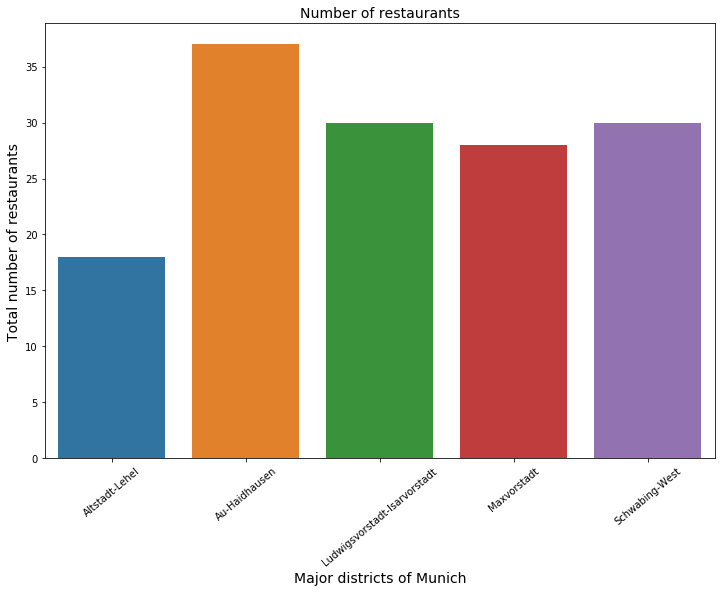

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='district', y='number of restaurants', data=Munich_5_district_restaurant_count)

bar.set_ylabel("Total number of restaurants", fontsize=14)
bar.set_xlabel("Major districts of Munich", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of restaurants", fontsize=14)
plt.show()


Visualize the restaurants of each district

In [20]:
map_restaurants = folium.Map(location=[Munich_latitude, Munich_longitude], zoom_start=12, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Altstadt-Lehel', 'Schwabing-West', 'Au-Haidhausen', 'Ludwigsvorstadt-Isarvorstadt', 'Maxvorstadt']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Munich_5_district_restaurant['Venue Latitude'], 
                                  Munich_5_district_restaurant['Venue Longitude'], 
                                  Munich_5_district_restaurant['Venue Category'], 
                                  Munich_5_district_restaurant['Neighborhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

Check the number of restaurant categories

In [21]:
print('There are {} unique categories:'.format(len(Munich_5_district_restaurant['Venue Category'].unique())))
print (Munich_5_district_restaurant['Venue Category'].unique())

There are 36 unique categories:
['German Restaurant' 'Italian Restaurant' 'Korean Restaurant'
 'Austrian Restaurant' 'Mediterranean Restaurant' 'Japanese Restaurant'
 'Sushi Restaurant' 'Indian Restaurant' 'Afghan Restaurant'
 'Eastern European Restaurant' 'Bavarian Restaurant' 'Spanish Restaurant'
 'Vietnamese Restaurant' 'Asian Restaurant' 'American Restaurant'
 'Restaurant' 'Seafood Restaurant' 'Greek Restaurant'
 'Vegetarian / Vegan Restaurant' 'Dim Sum Restaurant'
 'Fast Food Restaurant' 'Portuguese Restaurant' 'Tapas Restaurant'
 'Modern European Restaurant' 'French Restaurant' 'Doner Restaurant'
 'Kebab Restaurant' 'Dumpling Restaurant' 'Falafel Restaurant'
 'Chinese Restaurant' 'Middle Eastern Restaurant' 'Peruvian Restaurant'
 'Thai Restaurant' 'Mexican Restaurant' 'Jewish Restaurant'
 'Turkish Restaurant']


In [22]:
print (Munich_5_district_restaurant['Venue Category'].value_counts())

Italian Restaurant               30
German Restaurant                17
Restaurant                        7
French Restaurant                 7
Vietnamese Restaurant             7
Japanese Restaurant               7
Indian Restaurant                 6
Asian Restaurant                  5
Afghan Restaurant                 4
Greek Restaurant                  4
Thai Restaurant                   4
Vegetarian / Vegan Restaurant     4
Spanish Restaurant                4
Sushi Restaurant                  3
Austrian Restaurant               3
Tapas Restaurant                  3
Mediterranean Restaurant          3
Bavarian Restaurant               3
Mexican Restaurant                2
Seafood Restaurant                2
Doner Restaurant                  2
Chinese Restaurant                2
Fast Food Restaurant              1
Portuguese Restaurant             1
Peruvian Restaurant               1
Dim Sum Restaurant                1
Falafel Restaurant                1
Middle Eastern Restaurant   

Consider only top 10 highest frequency categories

In [23]:
Munich_5_district_restaurant_Top10 = Munich_5_district_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Munich_5_district_restaurant_Top10 = Munich_5_district_restaurant_Top10.reset_index()

Munich_5_district_restaurant_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
#Munich_5_district_restaurant_Top10

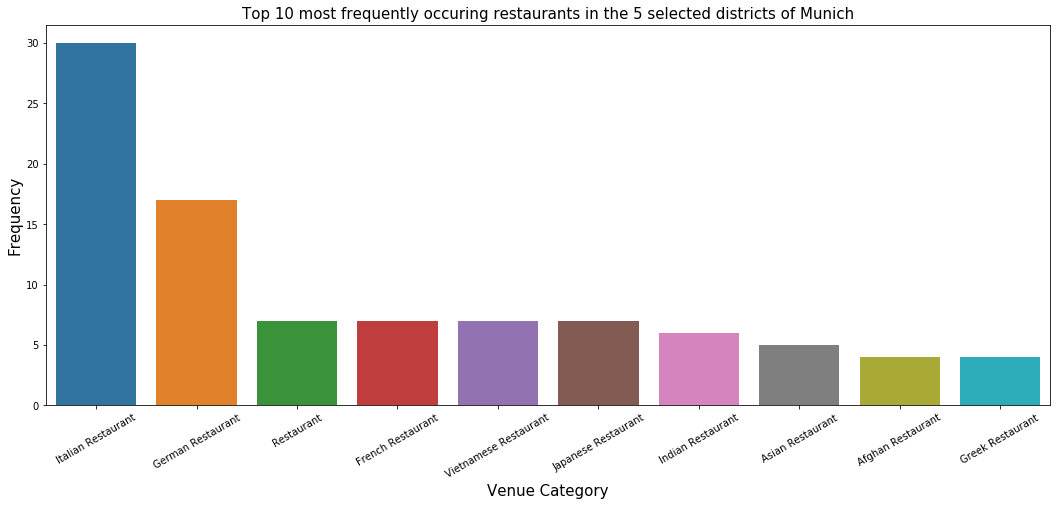

In [24]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=Munich_5_district_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Top 10 most frequently occuring restaurants in the 5 selected districts of Munich', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

In [25]:
Munich_5_district_restaurant['Venue Category'].isin(Munich_5_district_restaurant_Top10['Venue Category'].tolist())
Munich_5_district_restaurant_top10_data = Munich_5_district_restaurant[Munich_5_district_restaurant['Venue Category'].isin(Munich_5_district_restaurant_Top10['Venue Category'].tolist())]
Munich_5_district_restaurant_top10_data

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Altstadt-Lehel,48.143648,11.589579,Liebighof im Lehel,48.141640,11.586470,German Restaurant
2,Altstadt-Lehel,48.143648,11.589579,La Stanza,48.139830,11.586984,Italian Restaurant
3,Altstadt-Lehel,48.143648,11.589579,Tattenbach,48.139932,11.589913,German Restaurant
5,Altstadt-Lehel,48.143648,11.589579,Mezza Via,48.140460,11.591174,Italian Restaurant
6,Altstadt-Lehel,48.143648,11.589579,Pepenero,48.139426,11.589606,Italian Restaurant
...,...,...,...,...,...,...,...
138,Au-Haidhausen,48.130274,11.598334,Maierbräu Altomünster,48.129253,11.605310,German Restaurant
139,Au-Haidhausen,48.130274,11.598334,Gaststätte Zum Brünnstein,48.129375,11.605269,German Restaurant
140,Au-Haidhausen,48.130274,11.598334,MUN Restaurant,48.133335,11.593090,Asian Restaurant
141,Au-Haidhausen,48.130274,11.598334,Il Padrino,48.133354,11.603757,Italian Restaurant


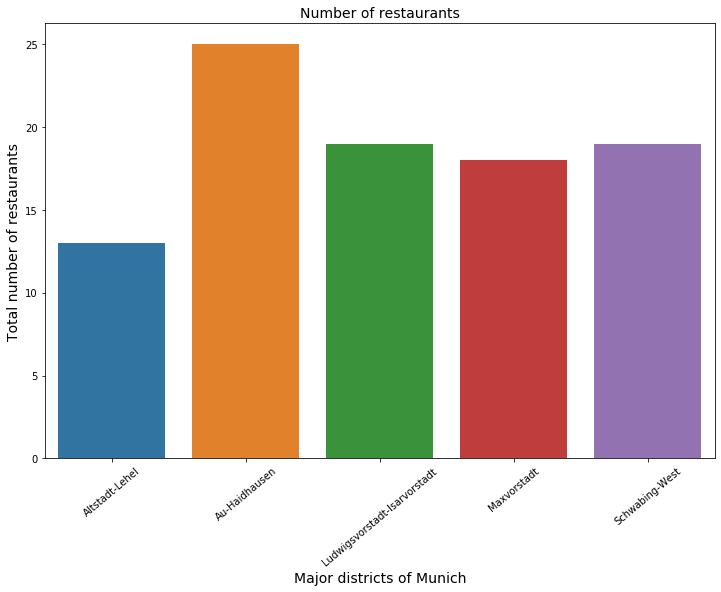

In [26]:
Munich_5_district_restaurant_count = Munich_5_district_restaurant_top10_data.groupby(['Neighborhood'])['Venue Category'].count()
Munich_5_district_restaurant_count = Munich_5_district_restaurant_count.to_frame().reset_index()
Munich_5_district_restaurant_count.columns = ['district', 'number of restaurants']
#Munich_5_district_restaurant_count

fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='district', y='number of restaurants', data=Munich_5_district_restaurant_count)

bar.set_ylabel("Total number of restaurants", fontsize=14)
bar.set_xlabel("Major districts of Munich", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of restaurants", fontsize=14)
plt.show()

Apply One Hot encoding to the top 10 venue categories

In [27]:
Munich_5_district_restaurant_onehot = pd.get_dummies(Munich_5_district_restaurant_top10_data[['Venue Category']], prefix="", prefix_sep="")

Munich_5_district_restaurant_onehot['Neighborhood'] = Munich_5_district_restaurant_top10_data['Neighborhood'] 
fixed_columns = [Munich_5_district_restaurant_onehot.columns[-1]] + list(Munich_5_district_restaurant_onehot.columns[:-1])
Munich_5_district_restaurant_onehot = Munich_5_district_restaurant_onehot[fixed_columns]
#Munich_5_district_restaurant_onehot.head(3)

In [28]:
Munich_5_district_restaurant_grouped = Munich_5_district_restaurant_onehot.groupby('Neighborhood').mean().reset_index()
Munich_5_district_restaurant_grouped.index = np.arange(1, len(Munich_5_district_restaurant_grouped)+1)
Munich_5_district_restaurant_grouped

,Neighborhood,Afghan Restaurant,Asian Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Vietnamese Restaurant
1,Altstadt-Lehel,0.076923,0.000000,0.000000,0.230769,0.000000,0.076923,0.538462,0.076923,0.000000,0.000000
2,Au-Haidhausen,0.040000,0.040000,0.160000,0.240000,0.000000,0.080000,0.400000,0.040000,0.000000,0.000000
3,Ludwigsvorstadt-Isarvorstadt,0.105263,0.157895,0.000000,0.210526,0.052632,0.052632,0.105263,0.052632,0.105263,0.157895
4,Maxvorstadt,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.333333,0.055556,0.277778,0.000000
5,Schwabing-West,0.000000,0.052632,0.000000,0.052632,0.157895,0.105263,0.263158,0.157895,0.000000,0.210526


Evaluate top 5 most frequent restaurant categories for each district

In [29]:
num_category = 5

for district in Munich_5_district_restaurant_grouped['Neighborhood']:
    print(district)
    temp = Munich_5_district_restaurant_grouped[Munich_5_district_restaurant_grouped['Neighborhood'] == district].T.reset_index()
    temp.columns = ['Category','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_category))
    print('\n')
    
    #plotdata = temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_category);
    #plotdata['Frequency'] *= 100
    #fig = plt.figure(figsize=(12,8))
    #bar = sns.barplot(x='Category', y='Frequency', data=plotdata)

    #bar.set_ylabel("Frequency", fontsize=14)
    #bar.set_xlabel("Categories", fontsize=14)
    #bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
    #bar.set_title("District: "+district, fontsize=14)
    #plt.show()

Altstadt-Lehel
              Category  Frequency
0   Italian Restaurant       0.54
1    German Restaurant       0.23
2    Afghan Restaurant       0.08
3    Indian Restaurant       0.08
4  Japanese Restaurant       0.08


Au-Haidhausen
             Category  Frequency
0  Italian Restaurant       0.40
1   German Restaurant       0.24
2   French Restaurant       0.16
3   Indian Restaurant       0.08
4   Afghan Restaurant       0.04


Ludwigsvorstadt-Isarvorstadt
                Category  Frequency
0      German Restaurant       0.21
1       Asian Restaurant       0.16
2  Vietnamese Restaurant       0.16
3      Afghan Restaurant       0.11
4     Italian Restaurant       0.11


Maxvorstadt
              Category  Frequency
0   Italian Restaurant       0.33
1           Restaurant       0.28
2    French Restaurant       0.17
3    German Restaurant       0.17
4  Japanese Restaurant       0.06


Schwabing-West
                Category  Frequency
0     Italian Restaurant       0.26
1  Vietnamese

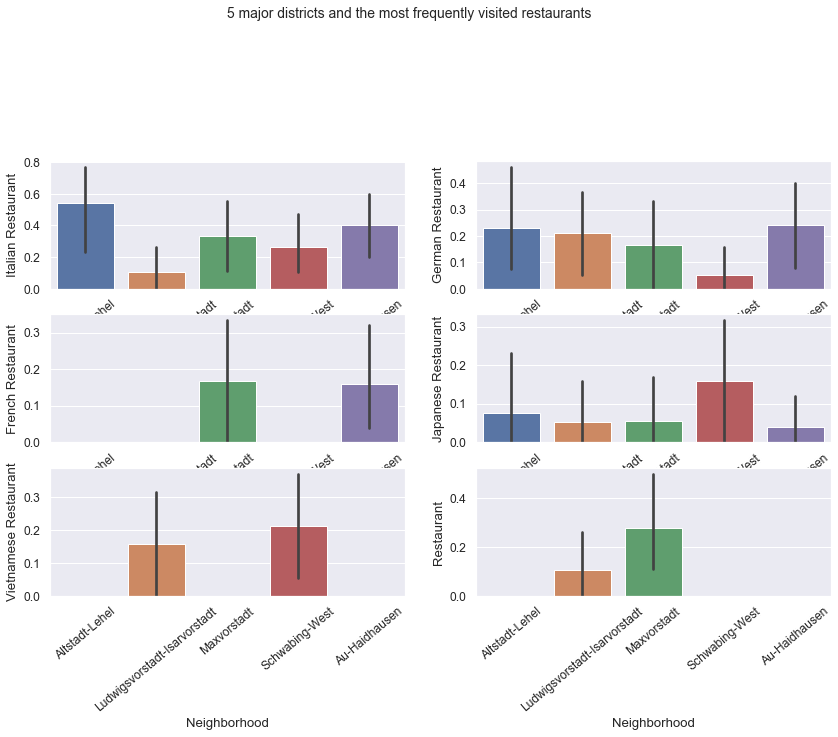

In [30]:
fig = plt.figure(figsize=(14,8))
fig.tight_layout()

sns.set(font_scale=1.1)
ax = plt.subplot(3,2,1)
bar = sns.barplot(x="Neighborhood", y="Italian Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
plt.xlabel("")
ax = plt.subplot(3,2,2)
bar = sns.barplot(x="Neighborhood", y="German Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
plt.xlabel("")
ax = plt.subplot(3,2,3)
bar = sns.barplot(x="Neighborhood", y="French Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
plt.xlabel("")
ax = plt.subplot(3,2,4)
bar = sns.barplot(x="Neighborhood", y="Japanese Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
plt.xlabel("")
plt.subplot(3,2,5)
bar = sns.barplot(x="Neighborhood", y="Vietnamese Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
plt.subplot(3,2,6)
bar = sns.barplot(x="Neighborhood", y="Restaurant", data=Munich_5_district_restaurant_onehot);
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 major districts and the most frequently visited restaurants', fontsize=14)
plt.show()

Top 10 venue categories per district

In [31]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['Neighborhood'] = Munich_5_district_restaurant_grouped['Neighborhood']

for ind in np.arange(Munich_5_district_restaurant_grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Munich_5_district_restaurant_grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Altstadt-Lehel,Italian Restaurant,German Restaurant,Japanese Restaurant,Indian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant,French Restaurant,Asian Restaurant
2,Au-Haidhausen,Italian Restaurant,German Restaurant,French Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant
3,Ludwigsvorstadt-Isarvorstadt,German Restaurant,Vietnamese Restaurant,Asian Restaurant,Restaurant,Italian Restaurant,Afghan Restaurant,Japanese Restaurant,Indian Restaurant,Greek Restaurant,French Restaurant
4,Maxvorstadt,Italian Restaurant,Restaurant,German Restaurant,French Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Asian Restaurant,Afghan Restaurant
5,Schwabing-West,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Greek Restaurant,Indian Restaurant,German Restaurant,Asian Restaurant,Restaurant,French Restaurant,Afghan Restaurant


### Clustering using k-means

In [32]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3

Munich_grouped_clustering = Munich_5_district_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Cluster labels :",  kmeans.labels_[0:5])

Cluster labels : [2 2 0 1 0]


Visualize the clusters

In [33]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Munich_cluster_merged = df_selected

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Munich_cluster_merged = Munich_cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('Neighborhood'), on='district')

Munich_cluster_merged.head()

,No.,district,area,population,Search term,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Altstadt-Lehel,315,21.100,Stadtbezirk 01 Altstadt-Lehel,48.143648,11.589579,2,Italian Restaurant,German Restaurant,Japanese Restaurant,Indian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant,French Restaurant,Asian Restaurant
1,2,Ludwigsvorstadt-Isarvorstadt,440,51.644,Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt,48.130722,11.566526,0,German Restaurant,Vietnamese Restaurant,Asian Restaurant,Restaurant,Italian Restaurant,Afghan Restaurant,Japanese Restaurant,Indian Restaurant,Greek Restaurant,French Restaurant
2,3,Maxvorstadt,430,51.402,Stadtbezirk 03 Maxvorstadt,48.146570,11.571445,1,Italian Restaurant,Restaurant,German Restaurant,French Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Asian Restaurant,Afghan Restaurant
3,4,Schwabing-West,436,68.527,Stadtbezirk 04 Schwabing-West,48.166354,11.566191,0,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Greek Restaurant,Indian Restaurant,German Restaurant,Asian Restaurant,Restaurant,French Restaurant,Afghan Restaurant
4,5,Au-Haidhausen,422,61.356,Stadtbezirk 05 Au-Haidhausen,48.130274,11.598334,2,Italian Restaurant,German Restaurant,French Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant


In [34]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[Munich_latitude, Munich_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = ['red', 'blue', 'orange']
for lat, lon, poi, cluster in zip(Munich_cluster_merged['Latitude'], 
                                  Munich_cluster_merged['Longitude'], 
                                  Munich_cluster_merged['district'], 
                                  Munich_cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=markers_colors[cluster-1],
        fill=True,
        fill_color=markers_colors[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Explore clusters

In [35]:
Munich_Cluster1 = Munich_cluster_merged.loc[Munich_cluster_merged['Cluster Label'] == 0, 
                                    Munich_cluster_merged.columns[[3] + list(range(4, Munich_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Munich_Cluster1.shape[0]))
Munich_Cluster1

No of Neighbourhood in Cluster Label 0: 2


,population,Search term,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,51.644,Stadtbezirk 02 Ludwigsvorstadt-Isarvorstadt,48.130722,11.566526,0,German Restaurant,Vietnamese Restaurant,Asian Restaurant,Restaurant,Italian Restaurant,Afghan Restaurant,Japanese Restaurant,Indian Restaurant,Greek Restaurant,French Restaurant
3,68.527,Stadtbezirk 04 Schwabing-West,48.166354,11.566191,0,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Greek Restaurant,Indian Restaurant,German Restaurant,Asian Restaurant,Restaurant,French Restaurant,Afghan Restaurant


In [36]:
Munich_Cluster2 = Munich_cluster_merged.loc[Munich_cluster_merged['Cluster Label'] == 1, 
                                    Munich_cluster_merged.columns[[3] + list(range(4, Munich_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Munich_Cluster2.shape[0]))
Munich_Cluster2

No of Neighbourhood in Cluster Label 1: 1


,population,Search term,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,51.402,Stadtbezirk 03 Maxvorstadt,48.14657,11.571445,1,Italian Restaurant,Restaurant,German Restaurant,French Restaurant,Japanese Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Asian Restaurant,Afghan Restaurant


In [37]:
Munich_Cluster3 = Munich_cluster_merged.loc[Munich_cluster_merged['Cluster Label'] == 2, 
                                    Munich_cluster_merged.columns[[3] + list(range(4, Munich_cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Munich_Cluster3.shape[0]))
Munich_Cluster3

No of Neighbourhood in Cluster Label 2: 2


,population,Search term,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,21.100,Stadtbezirk 01 Altstadt-Lehel,48.143648,11.589579,2,Italian Restaurant,German Restaurant,Japanese Restaurant,Indian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant,French Restaurant,Asian Restaurant
4,61.356,Stadtbezirk 05 Au-Haidhausen,48.130274,11.598334,2,Italian Restaurant,German Restaurant,French Restaurant,Indian Restaurant,Japanese Restaurant,Asian Restaurant,Afghan Restaurant,Vietnamese Restaurant,Restaurant,Greek Restaurant


Cluster 0 (Ludwigvorstadt-Isarvorstadt, Schwabing-West) are more promissing district to open an Italian restaurant due to least competition